# **SIGMA** **WEDGE** **HACKATHON**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

## **IMPLEMENTATION OF QUANTROCKET**

In [ ]:
from quantrocket.license import set_license
set_license("2b416b15-de0e-11ee-b542-958e78a02bc9")

In [ ]:
from quantrocket.master import collect_usstock_listings
collect_usstock_listings()

In [ ]:
from quantrocket.master import get_securities
securities = get_securities(symbols='AAPL', fields=['Sid', 'Symbol', 'Exchange'], vendors='usstock')
securities

In [ ]:
from quantrocket.zipline import create_usstock_bundle
create_usstock_bundle("usstock-free-1min",free = True)

In [ ]:
from quantrocket.zipline import ingest_bundle
ingest_bundle("usstock-free-1min")

In [ ]:
from quantrocket import get_prices
price = get_prices("usstock-free-1min", data_frequency='daily', sids="FIBBG000B9XRY4", start_date='2023-01-01', end_date='2023-12-31', fields=["Close"])

## **DATA UPLOADING AND VISUVALIZATION**

In [54]:
price=pd.read_csv('/content/file1.csv')
price

,Field,Date,FIBBG000B9XRY4
0,Close,2023-01-03,124.375
1,Close,2023-01-04,125.658
2,Close,2023-01-05,124.325
3,Close,2023-01-06,128.900
4,Close,2023-01-09,129.427
...,...,...,...
245,Close,2023-12-22,193.600
246,Close,2023-12-26,193.050
247,Close,2023-12-27,193.150
248,Close,2023-12-28,193.580


In [55]:
price.rename(columns={"FIBBG000B9XRY4":"Close"},inplace=True) #Changing the Column Name

## **DATA VS CLOSE_VALUE**

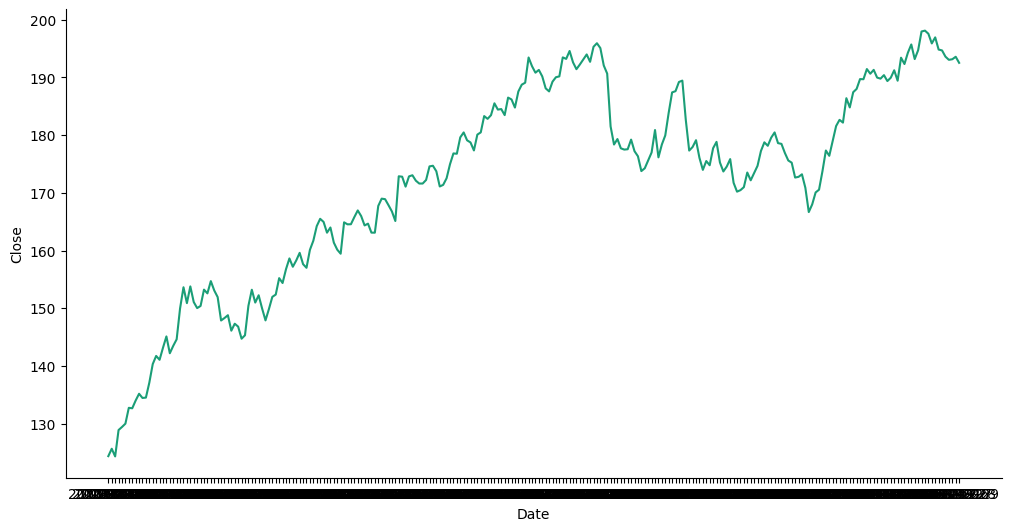

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = price.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')


## **Class Description:**

A class to model the behavior of a financial market based on daily closing prices.

## **Attributes:**

price (DataFrame): The financial data containing 'Date' and 'Close' columns.

returns (list): List to store daily returns.

state (list): List to store market states (1 for bull, 0 for flat, -1 for bear).

portfolio_values (list): List to store portfolio values over time.

optimal_buys (list): List to store indices of optimal buying opportunities.

## **Function Definitions:**

### **calculate_state():**

Calculate daily returns.
Determine market states based on returns.

### **find_trading_decision()**:

Calculate portfolio values based on market states.
Store optimal buying indices.

### **visualize_transition_probability():**

Visualize the transition probability distribution between different market states.

### **decide_buy():**

Decide whether to buy stock based on the change in portfolio value.


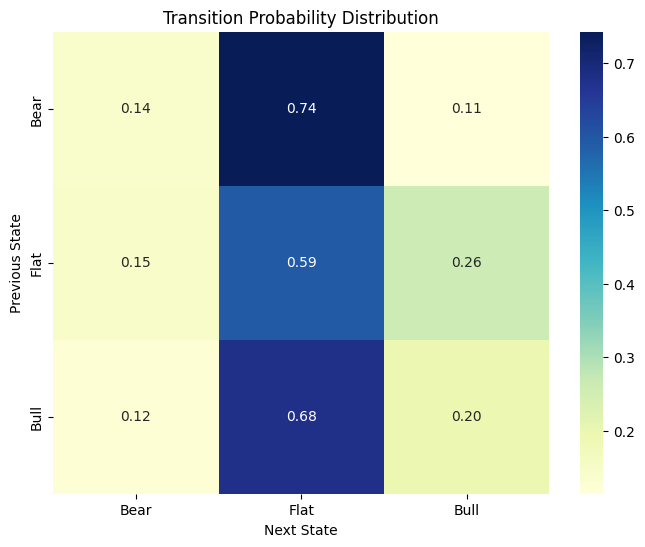

Matrix with Indices:
           Bear       Flat       Bull      
Bear       0.14       0.74       0.11      
Flat       0.15       0.59       0.26      
Bull       0.12       0.68       0.20      
Portfolio_values: 17
Optimal_Buy_Indices: [5, 6, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183, 185, 186, 187, 188, 1

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

class FinancialModeling:
    """
    Class for modeling financial data and making trading decisions.
    """

    def __init__(self):

        self.state = 0  # Initial state: Flat
        self.transition_counts = {
            -1: {-1: 0, 0: 0, 1: 0},
            0: {-1: 0, 0: 0, 1: 0},
            1: {-1: 0, 0: 0, 1: 0}
        }
        self.transition_probability_matrix = []
        self.portfolio_values = [0]
        self.portfolio_value = -1
        self.optimal_buys = []
        self.daily_updates = []

    def calculate(self):
        """
        Calculate trading decisions and portfolio values.
        """
        prices = list(price['Close'])
        for i in range(1, len(prices)):
            decision = self.find_trading_decision(prices[i], prices[i-1])
            self.daily_updates.append(f"Day {i+1}: Decision: {decision}, Portfolio Value: {self.portfolio_value}")

    def calculate_returns(self, current_price, prev_price):
        """
        Calculate returns based on current and previous prices.
        """
        return (current_price - prev_price) / prev_price

    def update_portfolio_value(self, decision, prev_state, current_state):
        """
        Update portfolio value based on trading decision and state transition.
        """
        if prev_state == 0 and current_state == 1:
            self.portfolio_value += 1
        elif prev_state == 0 and current_state == -1:
            self.portfolio_value -= 1

    def update_transition_counts(self, prev_state, current_state):
        """
        Update transition counts between states.
        """
        self.transition_counts[prev_state][current_state] += 1

    def calculate_transition_probabilities(self):
        """
        Calculate transition probabilities based on transition counts.
        """
        transition_probabilities = {}
        for prev_state, transitions in self.transition_counts.items():
            total_transitions = sum(transitions.values())
            if total_transitions == 0:
                continue
            transition_probabilities[prev_state] = {
                next_state: count / total_transitions
                for next_state, count in transitions.items()
            }
        self.transition_probability_matrix = transition_probabilities
        return transition_probabilities

    def find_trading_decision(self, current_price, prev_price):
        """
        Make trading decision based on returns and transition probabilities.
        """
        returns = self.calculate_returns(current_price, prev_price)

        if returns >= 0.01:
            current_state = 1  # Bull
        elif -0.01 <= returns < 0.01:
            current_state = 0  # Flat
        else:
            current_state = -1  # Bear

        prev_state = self.state

        transition_probabilities = self.calculate_transition_probabilities()

        if self.state in transition_probabilities:
            prob_increase = transition_probabilities[self.state].get(1, 0)
            prob_decrease = transition_probabilities[self.state].get(-1, 0)

            if prob_increase > prob_decrease:
                decision = 1
                if not self.portfolio_values:  # If portfolio_values is empty, append the initial portfolio value
                    self.portfolio_values.append(self.portfolio_value)
                # Only append the index if the decision is to buy
                if decision == 1:
                    self.optimal_buys.append(len(self.portfolio_values) )
            else:
                decision = 0
        else:
            decision = 0

        self.update_portfolio_value(decision, prev_state, current_state)
        self.portfolio_values.append(self.portfolio_value)  # Append portfolio value after decision
        self.update_transition_counts(self.state, current_state)
        self.state = current_state

        return decision

    def visualize_transition_probability(self):
        """
        Visualize transition probability distribution.
        """
        labels = ["Bear", "Flat", "Bull"]
        matrix = []
        for i in self.transition_probability_matrix:
            temp = []
            for j in self.transition_probability_matrix[i]:
                temp.append(self.transition_probability_matrix[i][j])
            matrix.append(temp)

        # Create heatmap with custom colors
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True, xticklabels=labels, yticklabels=labels)
        plt.title('Transition Probability Distribution')
        plt.xlabel('Next State')
        plt.ylabel('Previous State')
        plt.show()

        # Print matrix with indices
        print("Matrix with Indices:")
        print("{:<10} {:<10} {:<10} {:<10}".format("", *labels))
        for i, row in enumerate(matrix):
            print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f}".format(labels[i], *row))
        optimal_buys_date = []
        for i in self.optimal_buys:
            optimal_buys_date.append(price.iloc[i]['Date'])
        print('Portfolio_values:', self.portfolio_values[-1])
        print('Optimal_Buy_Indices:', self.optimal_buys)
        print('Buy_Dates : ', optimal_buys_date)
        return self.daily_updates

# Instantiate FinancialModeling object
portfolio = FinancialModeling()
portfolio.calculate()
values = portfolio.visualize_transition_probability()


In [112]:
values

['Day 2: Decision: 0, Portfolio Value: 0',
 'Day 3: Decision: 0, Portfolio Value: 0',
 'Day 4: Decision: 0, Portfolio Value: 0',
 'Day 5: Decision: 0, Portfolio Value: 0',
 'Day 6: Decision: 1, Portfolio Value: 0',
 'Day 7: Decision: 1, Portfolio Value: 1',
 'Day 8: Decision: 0, Portfolio Value: 1',
 'Day 9: Decision: 1, Portfolio Value: 2',
 'Day 10: Decision: 0, Portfolio Value: 2',
 'Day 11: Decision: 1, Portfolio Value: 2',
 'Day 12: Decision: 1, Portfolio Value: 2',
 'Day 13: Decision: 1, Portfolio Value: 3',
 'Day 14: Decision: 0, Portfolio Value: 3',
 'Day 15: Decision: 0, Portfolio Value: 3',
 'Day 16: Decision: 1, Portfolio Value: 3',
 'Day 17: Decision: 1, Portfolio Value: 4',
 'Day 18: Decision: 1, Portfolio Value: 4',
 'Day 19: Decision: 1, Portfolio Value: 4',
 'Day 20: Decision: 1, Portfolio Value: 4',
 'Day 21: Decision: 1, Portfolio Value: 4',
 'Day 22: Decision: 1, Portfolio Value: 5',
 'Day 23: Decision: 1, Portfolio Value: 5',
 'Day 24: Decision: 1, Portfolio Value: 